# Ex - GroupBy

### Introduction:

GroupBy can be summarized as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

In [2]:
pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


### Step 3. Assign it to a variable called drinks.

In [3]:
df_drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')

### Step 4. Which continent drinks more beer on average?

In [87]:
#he interpretado mal el enunciado y elegido los países que beben más cerveza con respecto a la media
mean_bear = df_drinks.beer_servings.mean()
df_drinks.sort_values('beer_servings', ascending=False)[df_drinks['beer_servings'] > mean_bear]

C:\Users\holacons\AppData\Local\Temp\ipykernel_47232\3450673060.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_drinks.sort_values('beer_servings', ascending=False)[df_drinks['beer_servings'] > mean_bear]


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,AF
45,Czech Republic,361,170,134,11.8,EU
62,Gabon,347,98,59,8.9,AF
65,Germany,346,117,175,11.3,EU
98,Lithuania,343,244,56,12.9,EU
...,...,...,...,...,...,...
11,Bahamas,122,176,51,6.3,NA
145,St. Vincent & the Grenadines,120,221,11,6.3,NA
185,Uruguay,115,35,220,6.6,SA
189,Vietnam,111,2,1,2.0,AS


In [86]:
#he interpretado mal el enunciado y elegido los países que beben más cerveza con respecto a la media
mean_bear = df_drinks.beer_servings.mean()
df_continent_beer_promedio = df_drinks.groupby('continent')['beer_servings'].mean()
pd.DataFrame(df_continent_beer_promedio[df_continent_beer_promedio> mean_bear])

,beer_servings
continent,
EU,193.777778
NA,145.434783
SA,175.083333


In [16]:
#Resolución propuesta 
df_drinks.groupby('continent')['beer_servings'].mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [28]:
df_beer = df_drinks.sort_values(by='beer_servings', ascending=False)
df_beer.reset_index().query('country=="Spain"')

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
12,160,Spain,284,157,112,10.0,EU


In [34]:
df_continent_promedio = df_drinks.groupby('continent')
#Permite sacar la agrupación por continente
df_eu = df_continent_promedio.get_group('EU')
df_eu

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [38]:
#Vamos a hacer un gráfico de scatter
import matplotlib.pyplot as plt

In [94]:
df_af = df_continent_promedio.get_group('AF')

Text(160    284
Name: beer_servings, dtype: int64, 160    112
Name: wine_servings, dtype: int64, 'Spain')

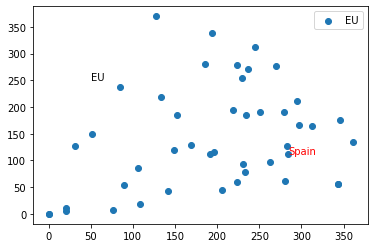

In [54]:
#Comparamos el consumo de cerveza con el consumo de vino
# plt.scatter(x='beer_servings', y='wine_servings', data=df_eu)
plt.scatter(x=df_eu.beer_servings, y=df_eu.wine_servings, label= 'EU')
plt.legend()
plt.text(x=50, y=250, s='EU')
plt.text(x=df_eu.beer_servings[df_eu.country=='Spain'], y=df_eu.wine_servings[df_eu.country=='Spain'], s='Spain', color='red')


In [53]:
df_af = df_continent_promedio.get_group('AF')

In [67]:
import numpy as np

In [82]:
df_drinks.fillna('NA', inplace=True)

In [88]:
continentes = df_drinks.continent.unique()
continentes

array(['AS', 'EU', 'AF', 'NA', 'SA', 'OC'], dtype=object)

In [89]:
df_g = df_drinks.groupby('continent')

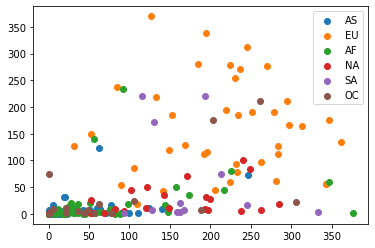

In [90]:
for continente in continentes:
    df_continente =df_g.get_group(continente)
    plt.scatter(x=df_continente.beer_servings, y=df_continente.wine_servings, label= continente)
plt.legend()



In [92]:
#Comprobamos si hay algún valor Na
df_drinks.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

### Step 5. For each continent print the statistics for wine consumption.

In [13]:
df_drinks.groupby(['continent'])['wine_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### Step 6. Print the mean alcohol consumption per continent for every column

In [16]:
df_drinks.groupby(['continent'])[['total_litres_of_pure_alcohol']].mean()

,total_litres_of_pure_alcohol
continent,
AF,3.007547
AS,2.170455
EU,8.617778
OC,3.381250
SA,6.308333


### Step 7. Print the median alcohol consumption per continent for every column

In [17]:
df_drinks.groupby(['continent']).median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [28]:
print('mean',df_drinks['spirit_servings'].mean())
print('min',df_drinks['spirit_servings'].min())
print('max',df_drinks['spirit_servings'].max())

mean 80.99481865284974
min 0
max 438


In [30]:
df_drinks[['spirit_servings']].describe()

,spirit_servings
count,193.000000
mean,80.994819
std,88.284312
min,0.000000
25%,4.000000
50%,56.000000
75%,128.000000
max,438.000000


In [7]:
df_drinks.groupby('continent')['spirit_servings'].agg(['mean','min','max'])

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302
